In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

import mltools as ml

In [3]:


X = np.genfromtxt('data/X_train.txt', delimiter=',')
Y = np.genfromtxt('data/Y_train.txt', delimiter=',')

X,Y = ml.shuffleData(X,Y)



## Approach using SKLearn scaler & mltools knn

In [9]:
scaler = StandardScaler()


Xtr, Xva, Ytr, Yva = ml.splitData(X,Y,0.7)
Xtr_scaled = scaler.fit_transform(Xtr, Ytr)
Xva_scaled = scaler.fit_transform(Xva,Yva)

### Not scaled

In [5]:
not_scaled_knn = ml.knn.knnClassify()

not_scaled_knn.train(Xtr, Ytr)

In [6]:
not_scaled_auc = not_scaled_knn.auc(Xva, Yva)

not_scaled_err = not_scaled_knn.err(Xva, Yva)

print(f"Dumb auc {not_scaled_auc} | Dumb Error {not_scaled_err}")

Dumb auc 0.5074151480766682 | Dumb Error 0.4921418949259093


### Scaled

In [13]:
scaled_knn = ml.knn.knnClassify()
scaled_knn.train(Xtr_scaled, Ytr)

KNeighborsClassifier(weights='distance')

In [10]:
scaled_auc = scaled_knn.auc(Xva, Yva)

scaled_err = scaled_knn.err(Xva, Yva)

print(f"Scaled auc {scaled_auc} | Scaled Error {scaled_err}")

Scaled auc 0.5403468915375986 | Scaled Error 0.4580152671755725


## Approach using SKLearn all the way

In [28]:
from sklearn.metrics import mean_squared_error, roc_auc_score

In [ ]:
scaler = StandardScaler()


Xtr, Xva, Ytr, Yva = ml.splitData(X,Y,0.7)
Xtr_scaled = scaler.fit_transform(Xtr, Ytr)
Xva_scaled = scaler.fit_transform(Xva,Yva)

### Not Scaled

In [29]:
not_scaled_sklearn_knn = KNeighborsClassifier(weights='distance')
sklearn_knn.fit(Xtr, Ytr)

KNeighborsClassifier(weights='distance')

In [30]:
Yva_hat = sklearn_knn.predict(Xva)

print(f"Not Scaled auc: {roc_auc_score(Yva, Yva_hat)} | Not scaled mse: {mean_squared_error(Yva, Yva_hat)}")

Not Scaled auc: 0.5216077819049374 | Not scaled mse: 0.4786708576560395


### Scaled

In [31]:
sklearn_knn = KNeighborsClassifier(weights='distance')
sklearn_knn.fit(Xtr_scaled, Ytr)

KNeighborsClassifier(weights='distance')

In [32]:
Yva_hat = sklearn_knn.predict(Xva_scaled)

print(f"Scaled auc: {roc_auc_score(Yva, Yva_hat)} | Scaled mse: {mean_squared_error(Yva, Yva_hat)}")

Scaled auc: 0.5556823067697271 | Scaled mse: 0.44454422990570275


SKLearn's KNN Classifier performs better than mltool's KNN Classifier across the board, both with efficiency and accuracy. 

## Varying n_neighbors

Now that we've determined to use SKLearn's KNN Classifier, and verified that Scaling is the way to go, let's check out other parameters.

In [50]:
scaler = StandardScaler()


Xtr, Xva, Ytr, Yva = ml.splitData(X,Y,0.7)
Xtr_scaled = scaler.fit_transform(Xtr, Ytr)
Xva_scaled = scaler.fit_transform(Xva,Yva)

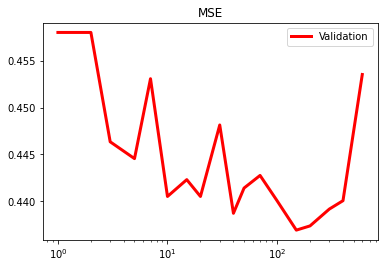

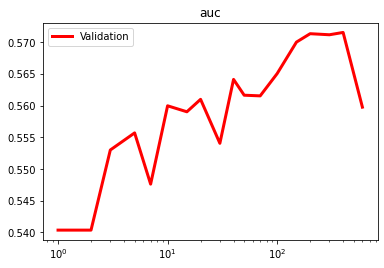

In [51]:
all_n_neighbors = [1,2,3,5,7,10,15,20,30,40,50,70,100,150,200,300,400,600]

n_neighbors_validation_auc = np.zeros(len(all_n_neighbors))
n_neighbors_validation_mse = np.zeros(len(all_n_neighbors))

for index,n_neighbors in enumerate(all_n_neighbors):

    knn = KNeighborsClassifier(n_neighbors = n_neighbors, weights='distance')
    knn.fit(Xtr_scaled, Ytr)
    
    Yva_hat = knn.predict(Xva_scaled)

    auc = roc_auc_score(Yva, Yva_hat)
    mse = mean_squared_error(Yva, Yva_hat)
    
    n_neighbors_validation_auc[index] = auc
    n_neighbors_validation_mse[index] = mse

fig, ax = plt.subplots(1,1)



#ax.plot(all_n_neighbors, training_error_rates, "g-", lw=3, label = "Training")
ax.semilogx(all_n_neighbors, n_neighbors_validation_mse, "r-", lw=3, label = "Validation")

plt.legend()
plt.title("MSE")
plt.show()


fig, ax = plt.subplots(1,1)



#ax.plot(all_n_neighbors, training_error_rates, "g-", lw=3, label = "Training")
ax.semilogx(all_n_neighbors, n_neighbors_validation_auc, "r-", lw=3, label = "Validation")

plt.legend()
plt.title("auc")
plt.show()
    

In [43]:
sklearn_knn = KNeighborsClassifier(weights='distance')
sklearn_knn.fit(Xtr_scaled, Ytr)

Scaled auc: 0.5599564223668345 | Scaled mse: 0.4405029187247418
